# Tolman-Oppenheimer-Volkoff (TOV) equations
---

The TOV equations describe spherically symmetric stars in equilibrium.

Consider a spherically symmetry time-independent metric,
\begin{align*}
    \text{d} s^{2} \ = \ - e^{2\Phi} \text{d}t^{2} \ + \ \left(1 - \frac{2m(r)}{r} \right)^{-1} \text{d}r^{2} \ + \ r^{2} \text{d}\Omega^{2} .
\end{align*}
Note that, $m(r)$, here is not a constant but a function of $r$, providing us with a convenient way to parametrize the metric.

Consider the energy-momntum tensor of a perfect fluid,
\begin{align*}
    T_{\mu\nu} \ = \ \rho h u_{\mu} u_{\nu} \ + \ p g_{\mu\nu} . 
\end{align*}
in which $h = 1 + p / \rho$.

The Einstein equations, $G_{\mu\nu} = 8\pi T_{\mu\nu}$, for this system yield,
\begin{align*}
    \frac{\text{d} m}{\text{d} r}    \ &= \ 4\pi r^{2} \rho \\
    \frac{\text{d} P}{\text{d} r}    \ &= -\frac{\left(\rho + P\right)\left(m + 4\pi P r^{3}\right)}{r\left(r - 2m\right)} \\ 
    \frac{\text{d} \Phi}{\text{d} r} \ &= -\frac{\text{d}P}{\text{d}r} \left(\rho + P\right)^{-1}
\end{align*}
These are known as the TOV equations.

In [3]:
import numpy             as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model parameters
r_o = 1.0e+6   # outer radius (maximum radius)
r_c = 1.0e-6   # central radius (minimum radius)
P_c = 1.0e+2   # central pressure (maximal pressure)

# Define the polytropic equation of state (EOS)
polytropic_index = 1.0
Gamma            = 1 + 1 / polytropic_index
eos              = lambda P: P**Gamma

# Define the right-hand side of the TOV equations
def rhs(r, y):
    # Unpack the variables
    m, P = y
    # Compute the density
    rho = eos(P)
    # Define the TOV equations (right-hand sides)
    dm_dr = 4 * np.pi * r**2 * rho
    dP_dr = -(rho + P) * (m + 4 * np.pi * P * r**3) / (r * (r - 2 * m))
    # Return the right-hand sides
    return [dm_dr, dP_dr]

# Solve the initial value problem
sol = solve_ivp(
    fun          = rhs,
    t_span       = np.array([r_c, r_o], dtype=np.float64),
    y0           = np.array([0.0, P_c], dtype=np.float64),
    method       = 'BDF',
    rtol         = 1.0e-12,
    atol         = 1.0e-16,
    dense_output = True
)

# Extract the solution
r        = sol.t
m, P     = sol.y
rho      = eos(P)
sol_TOV  = sol.sol

# Plot the solution
plt.plot(r, m,   label='m')
plt.plot(r, P,   label='P')
plt.plot(r, rho, label=r'$\rho$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r')
plt.legend()

/tmp/ipykernel_27484/105262749.py:13: RuntimeWarning: invalid value encountered in scalar power
  eos              = lambda P: P**Gamma


ValueError: array must not contain infs or NaNs

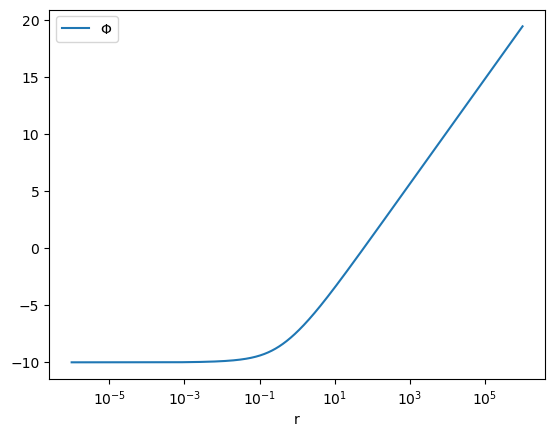

In [67]:
# Define the right-hand side of Phi equation
def rhs(r, y):
    Phi  = y[0]
    m, P = sol_TOV(r)
    # Compute the right-hand side
    dPhi_dr = (m + 4 * np.pi * P * r**3) / (r * (r - 2 * m))
    # Return the right-hand side
    return [dPhi_dr]

# Solve the initial value problem for the Phi equation
sol = solve_ivp(
    fun          = rhs,
    t_span       = np.array([r_c, r_o], dtype=np.float64),
    y0           = np.array([-10],      dtype=np.float64),
    method       = 'BDF',
    rtol         = 1.0e-12,
    atol         = 1.0e-16,
    dense_output = True,
    t_eval       = r
)

# Extract the solution
r       = sol.t
Phi     = sol.y[0]
sol_Phi = sol.sol

# Compute the lapse function alpha
alpha = np.exp(Phi)

# Plot the solution
plt.plot(r, Phi, label=r'$\Phi$')
plt.xscale('log')
plt.xlabel('r')
plt.legend()

## Manifestly conformally flat coordinates
---

The coordinates used above do not make the metric manifestly conformally flat.

Given a spatial metric of the form,
\begin{align*}
    \text{d} s^{2} \ = \ a^{2}(r) \text{d}r^{2} + r^{2} \text{d}\Omega^{2}
\end{align*}
it can be made manifestly conformally flat, by making the change of variables $R(r)$.
Defining the function, $A \equiv \partial_{R} r$, such that, $\text{d}r = A(r) \text{d}R$, and thus also, $A^{-1}=\partial_{r} R$, we find that,
\begin{align*}
    \text{d} s^{2} \ &= \ A^{2} a^{2} \left( \text{d}R^{2} + \frac{r^{2}}{A^{2} a^{2}} \, \text{d}\Omega^{2} \right) \\
                   \ &= \psi^{4} \left( \text{d}R^{2} + R^{2} \text{d}\Omega^{2} \right)
\end{align*}
To make the second equality hold, we require,
\begin{align*}
\psi^{-2}                          \ &= \ \frac{1}{a} \frac{\text{d} R}{\text{d} r} \\
\frac{\text{d} \log R}{\text{d} r} \ &= \ \frac{a(r)}{r}
\end{align*}
Hence, in the particular case above, where $a = \left(1 - 2m(r)/r \right)^{-1/2}$, we have,
\begin{align*}
    \frac{\text{d} \log R}{\text{d} r} \ &= \ \frac{1}{\sqrt{r \left(r - 2 m(r)\right)}}
\end{align*}
and the conformal factor can be obtained as,
\begin{align*}
    \psi \ &= \ \sqrt{\frac{r}{R}}
\end{align*}
Furthermore, note that we have,
\begin{align}
    \alpha \ = \ e^{\Phi} 
\end{align}
in which
\begin{align*}
    \frac{\text{d} \Phi}{\text{d} r} \ &= \frac{m + 4\pi P r^{3}}{r\left(r - 2m\right)}
\end{align*}


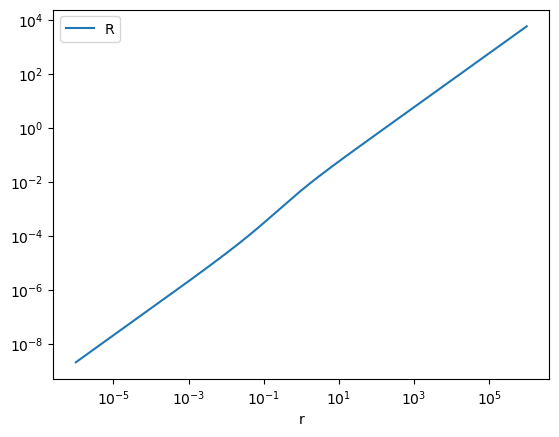

In [68]:
# Define the right-hand side of log R equation
def rhs(r, y):
    R    = y[0]
    m, P = sol_TOV(r)
    # Compute the right-hand side
    dlogR_dr = 1 / np.sqrt(r * (r - 2 * m))
    # Return the right-hand side
    return [dlogR_dr]

# Solve the initial value problem for the log R equation
sol = solve_ivp(
    fun          = rhs,
    t_span       = np.array([r_c, r_o], dtype=np.float64),
    y0           = np.array([-20],      dtype=np.float64),
    method       = 'BDF',
    rtol         = 1.0e-12,
    atol         = 1.0e-16,
    dense_output = True,
    t_eval       = r
)

# Extract the solution
r        = sol.t
R        = np.exp(sol.y[0])
sol_logR = sol.sol

# Compute the conformal factor \psi
psi = np.sqrt(r/R)

# Plot the solution
plt.plot(r, R, label='R')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r')
plt.legend()

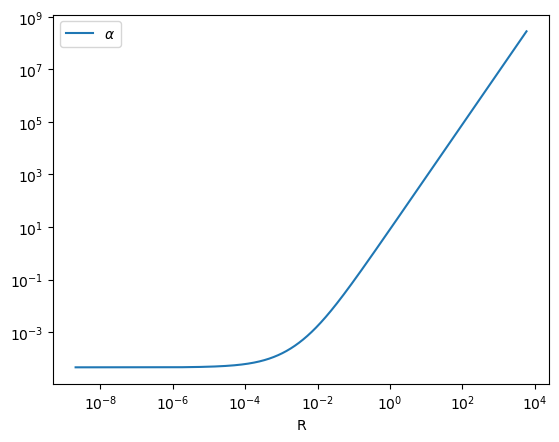

In [69]:
plt.plot(R, alpha, label=r'$\alpha$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R')
plt.legend()

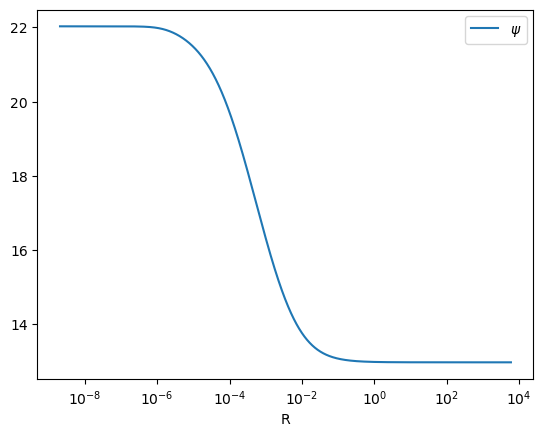

In [70]:
plt.plot(R, psi,   label=r'$\psi$')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('R')
plt.legend()

In [71]:
# Store the results
np.save(
    file = f'data/tov_{round(np.log10(r_o)):+}{round(np.log10(r_c)):+}{round(np.log10(P_c)):+}.npy',
    arr  = np.stack((r, m, P, rho, R, alpha, psi))
)